In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'Time.csv'
data = pd.read_csv(file_path)

data.head()

,GraphNumber,VertexNumber,EdgeNumber,PermutationTime(us),DFSTimev1(us),DFSTimev2(us)
0,1,3,3,15,0,0
1,2,4,5,29,0,0
2,3,5,7,126,0,0
3,4,6,9,613,0,0
4,5,7,11,4142,0,0


In [3]:
permutation_data = data[['VertexNumber', 'PermutationTime(us)']]
dfs_data = data[['VertexNumber', 'DFSTimev1(us)', 'DFSTimev2(us)']]

permutation_data = permutation_data[permutation_data['PermutationTime(us)'] != 0]
dfs_data = dfs_data[(dfs_data['DFSTimev1(us)'] != 0) | (dfs_data['DFSTimev2(us)'] != 0)]
(permutation_data.head(), dfs_data.head())

(   VertexNumber  PermutationTime(us)
 0             3                   15
 1             4                   29
 2             5                  126
 3             6                  613
 4             7                 4142,
     VertexNumber  DFSTimev1(us)  DFSTimev2(us)
 11             3             10             17
 12             4             12             28
 13             5             17             38
 14             6             22             48
 15             7             40            103)

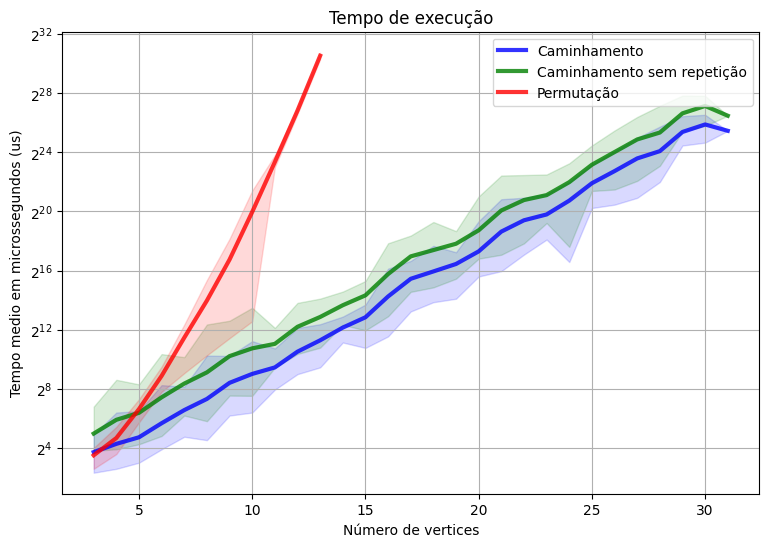

In [68]:
plt.figure(figsize=(9, 6))

# Supondo que dfs_data tenha múltiplas entradas para cada VertexNumber e desejamos encontrar o max e min para representar a variação
# Se dfs_data não tiver múltiplas entradas para cada VertexNumber, você precisaria de uma forma diferente de calcular a variação

# Para PermutationTime
permutation_max = permutation_data.groupby('VertexNumber')['PermutationTime(us)'].max()
permutation_min = permutation_data.groupby('VertexNumber')['PermutationTime(us)'].min()

# Para DFSTimev1 e DFSTimev2, assumindo dfs_data tem múltiplas medições para cada VertexNumber
dfs_max_v1 = dfs_data.groupby('VertexNumber')['DFSTimev1(us)'].max()
dfs_min_v1 = dfs_data.groupby('VertexNumber')['DFSTimev1(us)'].min()

dfs_max_v2 = dfs_data.groupby('VertexNumber')['DFSTimev2(us)'].max()
dfs_min_v2 = dfs_data.groupby('VertexNumber')['DFSTimev2(us)'].min()

# Calcular a média para cada VertexNumber para PermutationTime
permutation_mean = permutation_data.groupby('VertexNumber')['PermutationTime(us)'].mean()

# Calcular a média para DFSTimev1 e DFSTimev2
dfs_mean_v1 = dfs_data.groupby('VertexNumber')['DFSTimev1(us)'].mean()
dfs_mean_v2 = dfs_data.groupby('VertexNumber')['DFSTimev2(us)'].mean()

# Plotando as áreas que representam a variação
plt.fill_between(dfs_max_v1.index, dfs_min_v1, dfs_max_v1, alpha=0.15, color='blue')
plt.fill_between(dfs_max_v2.index, dfs_min_v2, dfs_max_v2, alpha=0.15, color='green')
plt.fill_between(permutation_max.index, permutation_min, permutation_max, alpha=0.15, color='red')

# Plotar as médias como linhas no gráfico
plt.plot(dfs_mean_v1.index, dfs_mean_v1, label='Caminhamento', color='blue', linewidth=3, alpha=0.8)
plt.plot(dfs_mean_v2.index, dfs_mean_v2, label='Caminhamento sem repetição', color='green', linewidth=3, alpha=0.8)
plt.plot(permutation_mean.index, permutation_mean, label='Permutação', color='red', linewidth=3, alpha=0.8)

plt.title('Tempo de execução')
plt.xlabel('Número de vertices')
plt.ylabel('Tempo medio em microssegundos (us)')
plt.yscale('log', base=2)
plt.legend()
plt.grid(True)
plt.show()


In [69]:
file_path = 'Count.csv'
data = pd.read_csv(file_path)

data.head()

,GraphNumber,VertexNumber,EdgeNumber,PermutationOpCount,DFSv1OpCount,DFSv2OpCount
0,1,3,3,7,0,0
1,2,4,5,29,0,0
2,3,5,7,86,0,0
3,4,6,9,222,0,0
4,5,7,11,533,0,0


In [70]:
permutation_data = data[['VertexNumber', 'PermutationOpCount']]
dfs_data = data[['VertexNumber', 'DFSv1OpCount', 'DFSv2OpCount']]

permutation_data = permutation_data[permutation_data['PermutationOpCount'] != 0]
dfs_data = dfs_data[(dfs_data['DFSv1OpCount'] != 0) | (dfs_data['DFSv2OpCount'] != 0)]
(permutation_data.head(), dfs_data.head())

(   VertexNumber  PermutationOpCount
 0             3                   7
 1             4                  29
 2             5                  86
 3             6                 222
 4             7                 533,
     VertexNumber  DFSv1OpCount  DFSv2OpCount
 11             3            30           111
 12             4            84           390
 13             5           138           588
 14             6           208           820
 15             7           434          1910)

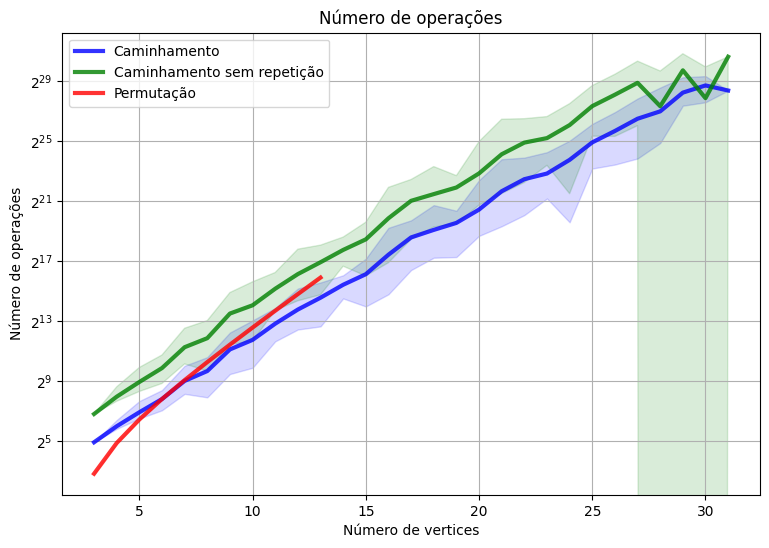

In [74]:
plt.figure(figsize=(9, 6))

# Supondo que dfs_data tenha múltiplas entradas para cada VertexNumber e desejamos encontrar o max e min para representar a variação
# Se dfs_data não tiver múltiplas entradas para cada VertexNumber, você precisaria de uma forma diferente de calcular a variação

# Para PermutationTime
permutation_max = permutation_data.groupby('VertexNumber')['PermutationOpCount'].max()
permutation_min = permutation_data.groupby('VertexNumber')['PermutationOpCount'].min()

# Para DFSTimev1 e DFSTimev2, assumindo dfs_data tem múltiplas medições para cada VertexNumber
dfs_max_v1 = dfs_data.groupby('VertexNumber')['DFSv1OpCount'].max()
dfs_min_v1 = dfs_data.groupby('VertexNumber')['DFSv1OpCount'].min()

dfs_max_v2 = dfs_data.groupby('VertexNumber')['DFSv2OpCount'].max()
dfs_min_v2 = dfs_data.groupby('VertexNumber')['DFSv2OpCount'].min()

# Calcular a média para cada VertexNumber para PermutationTime
permutation_mean = permutation_data.groupby('VertexNumber')['PermutationOpCount'].mean()

# Calcular a média para DFSTimev1 e DFSTimev2
dfs_mean_v1 = dfs_data.groupby('VertexNumber')['DFSv1OpCount'].mean()
dfs_mean_v2 = dfs_data.groupby('VertexNumber')['DFSv2OpCount'].mean()

# Plotando as áreas que representam a variação
plt.fill_between(dfs_max_v1.index, dfs_min_v1, dfs_max_v1, alpha=0.15, color='blue')
plt.fill_between(dfs_max_v2.index, dfs_min_v2, dfs_max_v2, alpha=0.15, color='green')
plt.fill_between(permutation_max.index, permutation_min, permutation_max, alpha=0.15, color='red')

# Plotar as médias como linhas no gráfico
plt.plot(dfs_mean_v1.index, dfs_mean_v1, label='Caminhamento', color='blue', linewidth=3, alpha=0.8)
plt.plot(dfs_mean_v2.index, dfs_mean_v2, label='Caminhamento sem repetição', color='green', linewidth=3, alpha=0.8)
plt.plot(permutation_mean.index, permutation_mean, label='Permutação', color='red', linewidth=3, alpha=0.8)

plt.title('Número de operações')
plt.xlabel('Número de vertices')
plt.ylabel('Número de operações')
plt.yscale('log', base=2)
plt.legend()
plt.grid(True)
plt.show()
